<a href="https://colab.research.google.com/github/deliciouscat/BPL_Prime_Number_Finder/blob/main/22QM_H_atom_WF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1) Run each code step by step


(2) Copy and paste to your own Colab notebook.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy.integrate as integrate

# Increase resolution for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Load interactive widgets
import ipywidgets as widgets

#import ipyvolume as ipv

In [ ]:
# Import special functions 
import scipy.special as spe

Define radial function $R_{nl}(r)$


In [ ]:
def psi_R(r,n=1,l=0):

    coeff = np.sqrt((2.0/n)**3 * spe.factormial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre

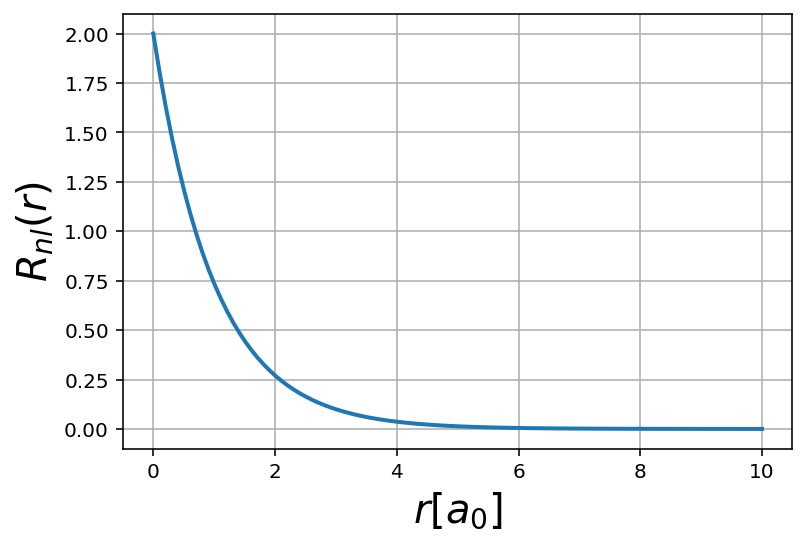

In [ ]:
r = np.linspace(0,10,100)

R10 = psi_R(r,n=1,l=0)
#R20 = psi_R(r,n=2,l=0)
#R21 = psi_R(r,n=2,l=1)

plt.plot(r, R10,lw=2)
#plt.plot(r, R20,lw=1)
#plt.plot(r, R21,lw=1)

plt.xlabel('$r [a_0]$',fontsize=20)

plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid('True')

Try change $n$ and $l$ values yourself.
 

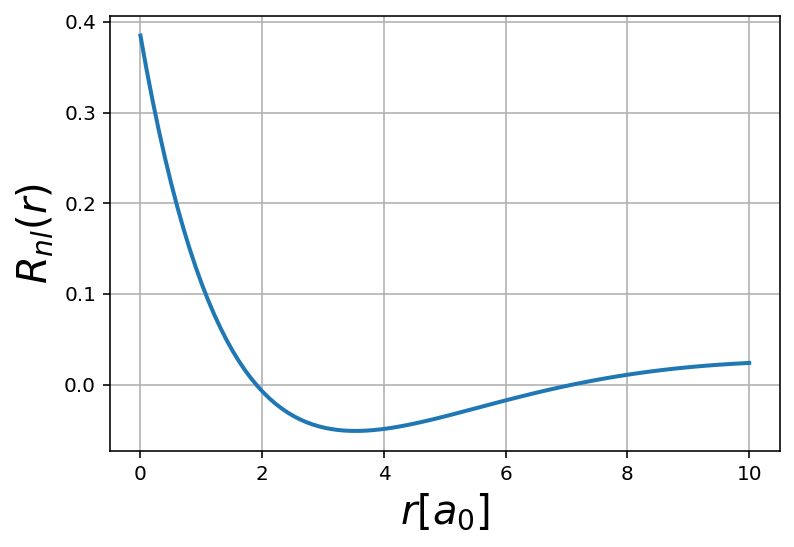

In [ ]:
r = np.linspace(0,10,100)

#R10 = psi_R(r,n=1,l=0)
R30 = psi_R(r,n=3,l=0)
#R21 = psi_R(r,n=2,l=1)

plt.plot(r, R30,lw=2)
#plt.plot(r, R20,lw=1)
#plt.plot(r, R21,lw=1)

plt.xlabel('$r [a_0]$',fontsize=20)

plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid('True')

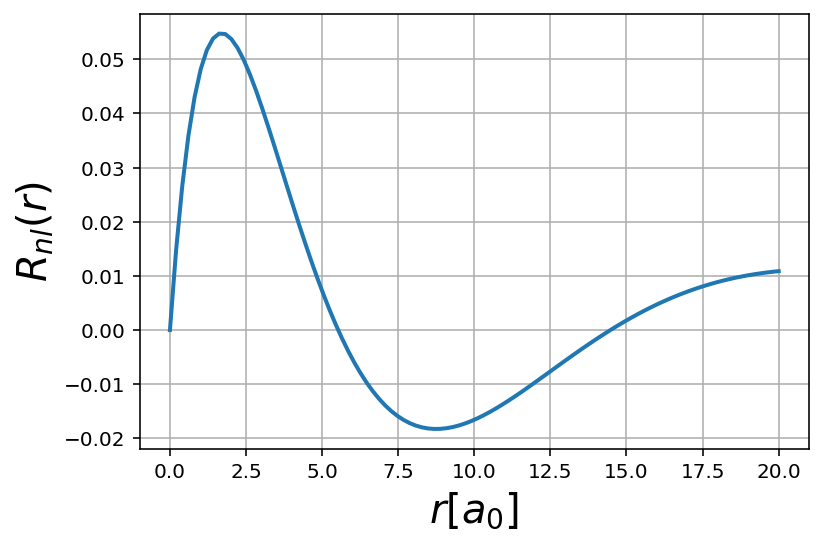

In [ ]:
r = np.linspace(0,20,100)

R = psi_R(r,n=4,l=1)


plt.plot(r, R,lw=2)

plt.xlabel('$r [a_0]$',fontsize=20)

plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid('True')

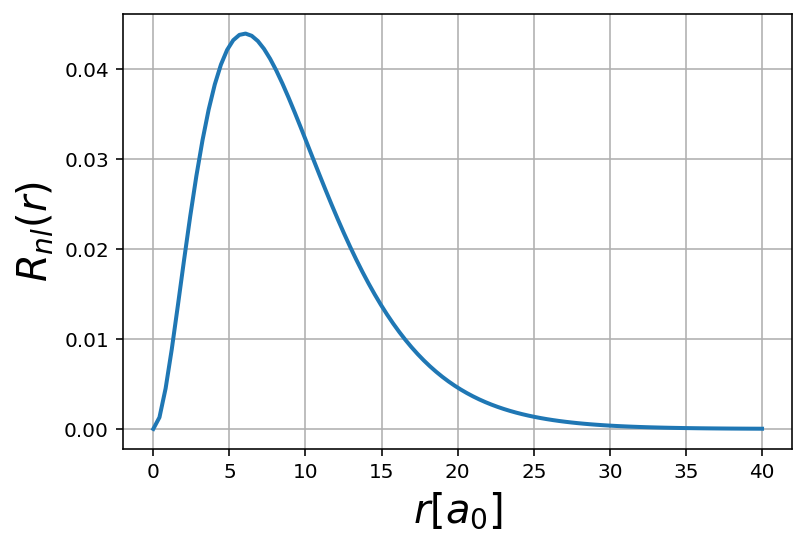

In [ ]:
r = np.linspace(0,40,100)

R = psi_R(r,n=3,l=2)

plt.plot(r, R,lw=2)

plt.xlabel('$r [a_0]$',fontsize=20)

plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid('True')

 # Orbital shape -- Spherical harmonics $Y_{\ell m}(\theta,\varphi)$

In [ ]:
def psi_ang(phi,theta,l=0,m=0):
    
    sphHarm = spe.sph_harm(m,l,phi,theta)
    
    return sphHarm.real

In [ ]:
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)

phi, theta = np.meshgrid(phi, theta)

Ylm = psi_ang(theta,phi,l=2,m=-1)
#Ylm = 0.5*( psi_ang(theta,phi,l=2,m=1) + psi_ang(theta,phi,l=2,m=-1) )

$\frac{x}{r} = \sin\theta\cos(\varphi), \frac{y}{r} = \sin\theta \sin(\varphi), \frac{z}{r} = \cos\theta$


In [ ]:
x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)

# Try different $l$ and $m$ values and see yourself.

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


(-1.0, 1.0)

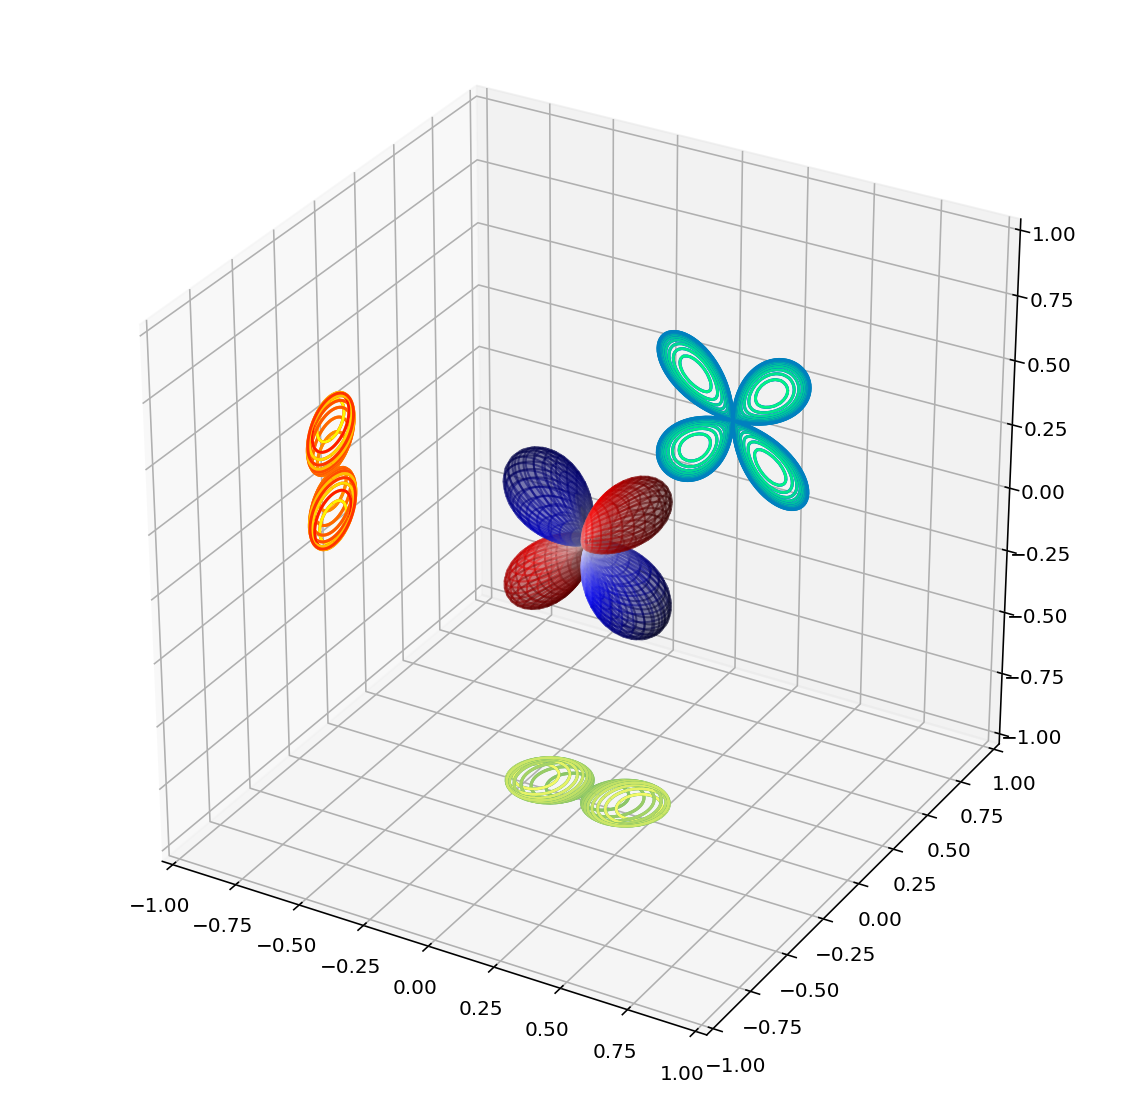

In [ ]:
'''Set up the 3D Canvas'''

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

''' Normalize color bar to [0,1] scale'''

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

'''Make 3D plot of real part of spherical harmonic'''

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)


''' Project 3D plot onto 2D planes'''

cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='autumn')


''' Set axes limit to keep aspect ratio 1:1:1 '''

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)